In [1]:
# plotly standard imports
import plotly.graph_objs as go
import chart_studio.plotly as py

# Cufflinks wrapper on plotly
import cufflinks

# Data science imports
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot, init_notebook_mode
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# Set global theme
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [2]:
from src.prepare_datasets import make_window_generator, get_prepared_datasets

train_df, test_df = get_prepared_datasets()

window = make_window_generator()

len(train_df) 1815724
full window width = 33
input_width = 32


# Test model predictions

In [3]:
from src.libs import load

model = load()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (8, 32, 32)               5632      
_________________________________________________________________
dense (Dense)                (8, 32, 1)                33        
Total params: 5,665
Trainable params: 5,665
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.evaluate(window.test, verbose=2)
model.reset_states()

1772/1772 - 3s - loss: 0.0042 - mean_absolute_error: 0.0310 - mean_squared_logarithmic_error: 0.0022


[0.004214301239699125, 0.03101721964776516, 0.002203284064307809]

Plot model

n 0 from 3
len(inputs) 8
n 1 from 3
len(inputs) 8
n 2 from 3
len(inputs) 8


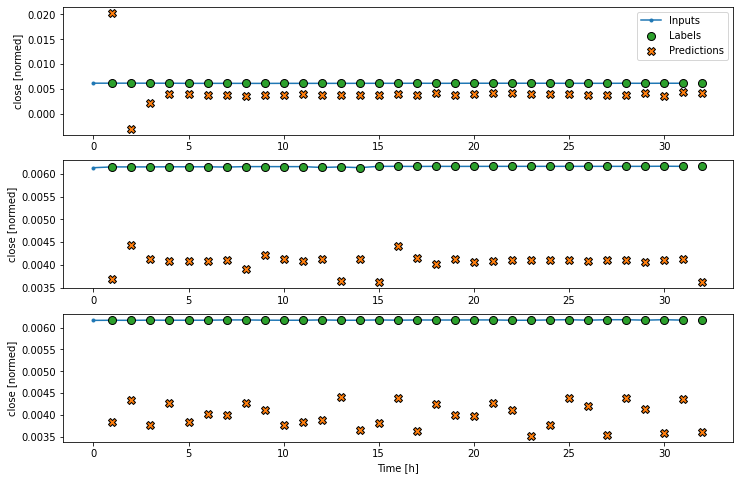

In [5]:
model.reset_states()

window.plot(model)

# Compare predictions and labels

In [6]:
import tensorflow as tf

test_window, label_window = next(iter(window.test))
model.reset_states()
predictions = model(test_window)

predictions = tf.reshape(predictions, [-1])
label_window = tf.reshape(label_window, [-1])

pred2labels = pd.DataFrame({ 'Predicted': predictions, 'Labels': label_window})

pred2labels.iplot()

In [7]:
import plotly.express as px

fig = px.scatter(x=pred2labels['Predicted'], y=pred2labels['Labels'])
fig.show()